In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the data.
df = pd.read_csv(r"walmart-sales-dataset-of-45stores.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
# Helpful to know the data type of each column as it has to be changed sometimes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Gives some statistics about the data.
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
# Check the number of nulls of each column.
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# Check for duplicates.
df.duplicated().sum()

0

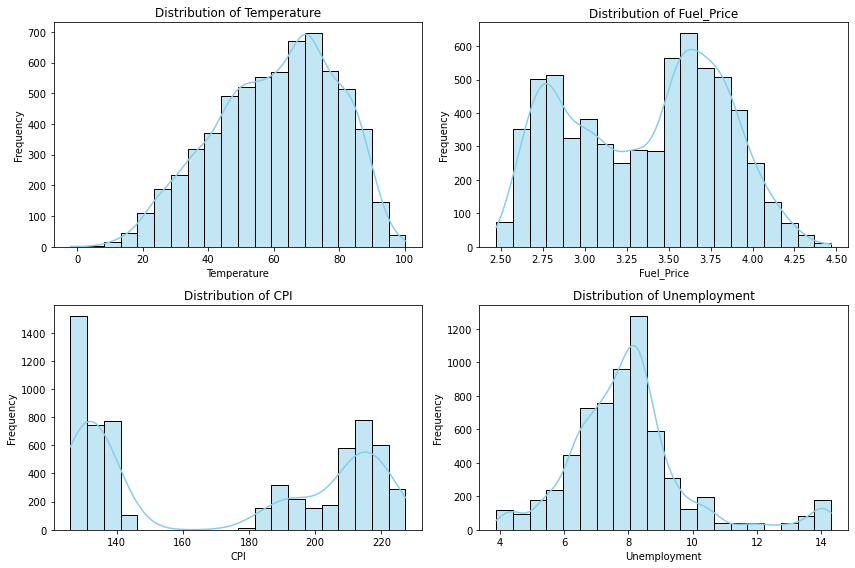

In [10]:
# Select quantitative variables for visualization
quantitative_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Loop through each quantitative variable and create a subplot for visualization
for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 2, i)

    # Create a histogram for the current variable
    sns.histplot(data=df, x=var, kde=True, color='skyblue', bins=20)

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Both temperature and unemployment are distributed normally with a little bit of skewing to the left in temperature and skewing to the right in unemployment.

In [31]:
# Group the data by store_id and calculate the total sales for each store.
total_sales_per_store = df.groupby('Store')["Weekly_Sales"].sum()
total_sales_per_store.sort_values(ascending = False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [12]:
# Get the stores' highest total sales store and its revenue (or we can get it at a glance
# by looking the plot below).
max_sales_store = total_sales_per_store.idxmax()
max_sales_amount = total_sales_per_store[max_sales_store]
print(f"The store that has the highest total sales is store {max_sales_store} with total sales of ${max_sales_amount:.2f}")

The store that has the highest total sales is store 20 with total sales of $301397792.46


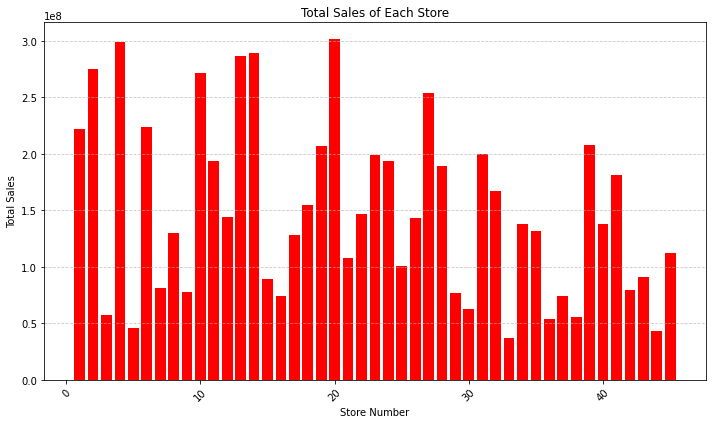

In [15]:
# Plot a bar chart for the total sales of each store.
# bar plot was used as stores numbers are quantitative data (consider them as stores names).
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_store.index, total_sales_per_store.values, color = 'red')
plt.title("Total Sales of Each Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Just as above, group the data by store_id and calculate the standard deviation of sales for each store.
std_sales_per_store = df.groupby('Store')["Weekly_Sales"].std()
std_sales_per_store.sort_values(ascending = False)

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

In [17]:
# Get the stores' highest standard deviation store and SD of its sales(or we can get it at a glance
# by looking the plot below).
max_std_store = std_sales_per_store.idxmax()
max_std_value = std_sales_per_store[max_std_store]
print(f"""The store that has the highest standard deviation in its sales
is store {max_std_store} with standard deviation of {max_std_value:.6f}""")

The store that has the highest standard deviation in its sales
is store 14 with standard deviation of 317569.949476


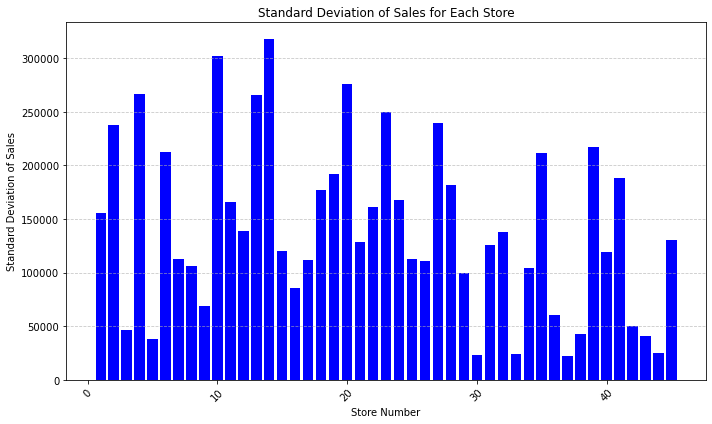

In [18]:
# Plot a bar chart for the SD of sales of each store.
# bar plot was used as stores numbers are quantitative data (consider them as stores names).
plt.figure(figsize=(10, 6))
plt.bar(std_sales_per_store.index, std_sales_per_store.values, color = 'blue')
plt.title("Standard Deviation of Sales for Each Store")
plt.xlabel("Store Number")
plt.ylabel("Standard Deviation of Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Convert 'date' column to datetime type if it's not already.
# (We saw above it's of type object)
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", dayfirst=True)
df.info() # To make sure that changes happened.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [20]:
# Step 1: Identify holiday dates.
Super_Bowl = ['2010-02-12', '2011-02-11', '2012-02-10']
Labour_Day = ['2010-09-10', '2011-09-09', '2012-09-07']
Thanksgiving = ['2010-11-26', '2011-11-25', '2012-11-23']
Christmas = ['2010-12-31', '2011-12-30', '2012-12-28']

In [21]:
#  Step 2: Calculate mean sales for non-holiday season.
non_holiday_mean_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
non_holiday_mean_sales

1041256.3802088564

In [22]:
# This shows us that the data ends on 26/10/2012, so the data of Thanksgiving on
# (23-11-2012) and Christmas on (28-12-2012) won't be included in our calculations.
sorted_df = df.groupby(df['Date'].dt.date).apply(lambda x: x.sort_values(by='Date', ascending=True))
sorted_df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                         
2010-02-05 0         1 2010-02-05    1643690.90             0        42.31   
           3432     25 2010-02-05     677231.63             0        21.10   
           3575     26 2010-02-05    1034119.21             0         9.55   
           3718     27 2010-02-05    1874289.79             0        27.19   
           3861     28 2010-02-05    1672352.29             0        49.47   
...                ...        ...           ...           ...          ...   
2012-10-26 2573     18 2012-10-26    1127516.25             0        56.09   
           2716     19 2012-10-26    1322117.96             0        56.49   
           2859     20 2012-10-26    2031650.55             0        60.04   
           3145     22 2012-10-26    1094422.69             0        57.58   
           6434     45 2012-10-26     760281.43             0        58.85   

                 Fuel_Price         CPI  Unemployment  
Date                                                   
2010-02-05 0          2.572  211.096358         8.106  
           3432       2.784  204.247194         8.187  
           3575       2.788  131.527903         8.488  
           3718       2.954  135.352461         8.237  
           3861       2.962  126.442065        13.975  
...                     ...         ...           ...  
2012-10-26 2573       3.917  138.728161         8.243  
           2716       4.071  138.728161         7.992  
           2859       3.882  216.151590         7.293  
           3145       3.917  142.762411         7.543  
           6434       3.882  192.308899         8.667  

[6435 rows x 8 columns]

In [23]:
# Step 3: Filter data for holiday dates and calculate mean sales for each holiday.
Super_Bowl_mean_sales = df.loc[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean()
Labour_Day_mean_sales = df.loc[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean()
Thanksgiving_mean_sales = df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean()
Christmas_mean_sales = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean()

In [34]:
# Step 4: Compare mean sales for each holiday with mean non-holiday sales.

# Store the mean sales values in a dictionary.
mean_sales_data = {
    'Holiday Type': ['Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas', 'Non-holiday'],
    'Mean Sales': [Super_Bowl_mean_sales, Labour_Day_mean_sales, Thanksgiving_mean_sales, Christmas_mean_sales, non_holiday_mean_sales]
}

# Create a DataFrame from the dictionary.
comparison = pd.DataFrame(mean_sales_data)
comparison.sort_values(by = 'Mean Sales', ascending = False)

,Holiday Type,Mean Sales
2,Thanksgiving,1.471273e+06
0,Super Bowl,1.079128e+06
1,Labour Day,1.042427e+06
4,Non-holiday,1.041256e+06
3,Christmas,9.608331e+05


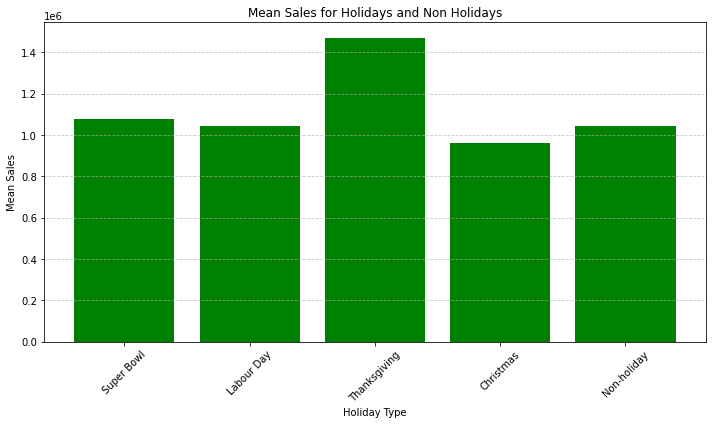

In [25]:
# Plot a bar chart to visualize the mean sales of each.
plt.figure(figsize=(10, 6))
plt.bar(comparison["Holiday Type"], comparison["Mean Sales"], color = 'green')
plt.title("Mean Sales for Holidays and Non Holidays")
plt.xlabel("Holiday Type")
plt.ylabel("Mean Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

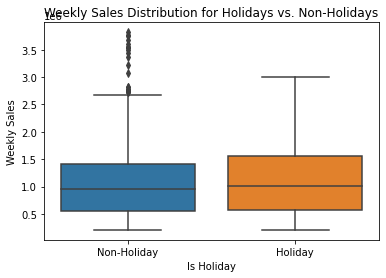

In [35]:
sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

### These show us that holidays have sales higher than non holidays.

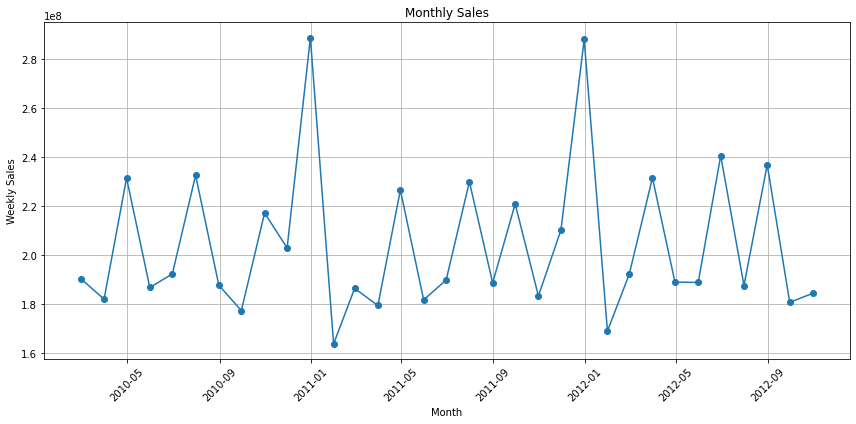

In [27]:
# Group the sales data by month and calculate total sales units for each month.
monthly_sales = df.resample('M', on='Date').sum()

# Plot monthly sales so that each point represents a single month.
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The line is going in the same rate along the chart, with noticeable rise at the end of the year which corresponds holidays like Thanksgiving and Christmas which may be kind of proof on what mentioned above about holidays having higher sales than non holidays.

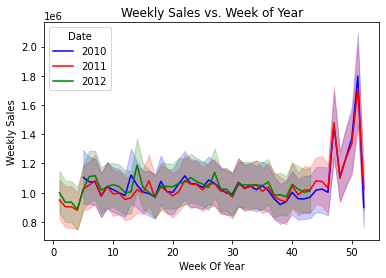

In [28]:
# Feature Engineering (Extracting date information from the Date column).
# They also could be added as additional features to the main data.

# To get the weeks of years on the x-axis.
WeekOfYear = df['Date'].dt.isocalendar().week.astype('int')

# To represent each year of the three by a colored line.
Year = df['Date'].dt.year.astype('int')

# Visualize the sales using the lineplot.
sns.lineplot(data=df, x=WeekOfYear, y='Weekly_Sales', hue=Year, palette=['blue', 'red', 'green'])
plt.xlabel('Week Of Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Week of Year')
plt.show()

### In term of semesters, we can see from the line plot the same pattern in each year of the three which is high sales in the semenster 2 (second half), especially at the end of each.

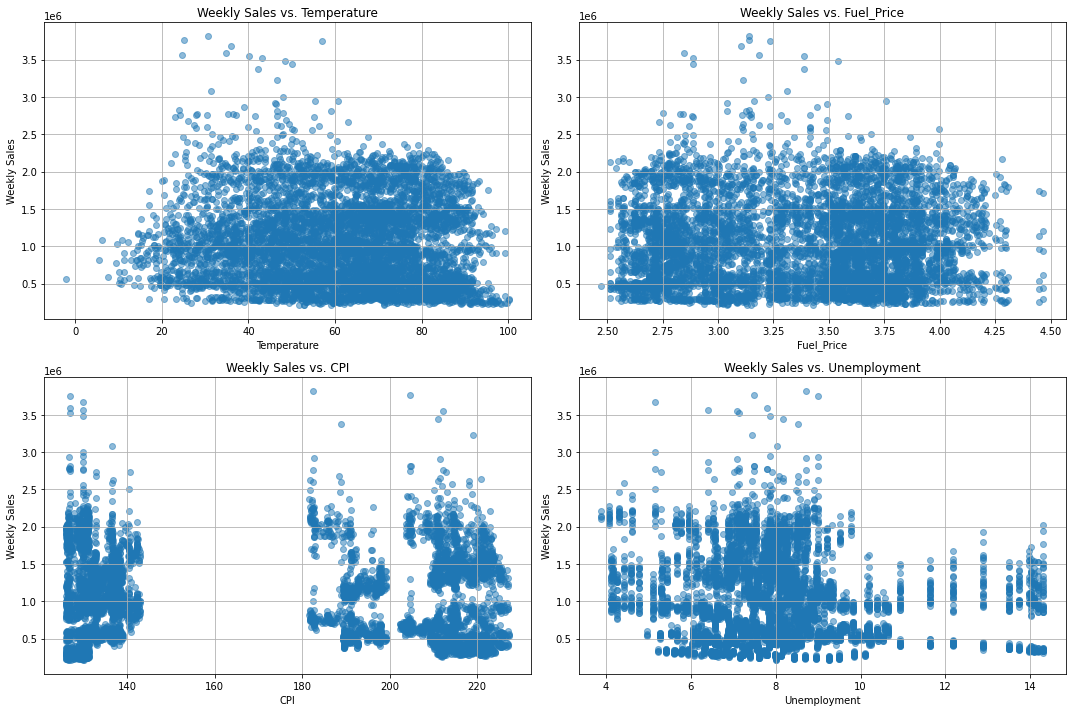

In [29]:
# Plot the relationships between weekly sales and other numeric features.
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['Weekly_Sales'], alpha=0.5)
    plt.title(f'Weekly Sales vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales')
    plt.grid(True)

plt.tight_layout()
plt.show()

### For the relation between weekly sales and both of temperature and fuel price, they seem be at the same level with some outliers in the weekly sales that disappears as temperature or fuel price goes higher. High weekly sales seem to be recorded when temperatures are pleasant - in the range 30-70 Fahrenheit

### Unlike the relationship with unemployment, which tends to be a negative relationship as weekly sales goes down as unemployment gets higher, the relationship with customer price index (CPI) is sort of stability when CPI is lower than 145 and greater than 182 but no weekly sales are being achieved in the range between 146 and 181 inclusice for CPI.